In [12]:
import pyvista as pv
import numpy as np
from pathlib import Path

In [13]:
file = Path('blood/centerlines.vtp')
cl = pv.read(file)

In [14]:
cl.n_cells, cl.n_lines, cl.n_arrays, cl.n_points

(6, 6, 1, 701)

In [15]:
cl2 = cl.compute_arc_length()
cl2['arc_length'].shape

(701,)

In [16]:
cl.head()

'PolyData (0x7f2fc39c2640)\n  N Cells:\t6\n  N Points:\t701\n  X Bounds:\t-4.257e+01, 2.567e+01\n  Y Bounds:\t-1.400e+00, 4.615e+01\n  Z Bounds:\t-1.812e+01, 9.256e+01\n  N Arrays:\t1\n'

In [17]:
npoints = [cl.cell_n_points(i) for i in range(cl.n_cells)]
start = np.cumsum([0]+npoints)
lines = [np.arange(start[i],start[i+1]) for i in range(len(start)-1)]
cl.compute_arc_length()
cl.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays : None

In [18]:
cl2 = cl.extract_cells(5)
cl2[cl2.array_names[1]]

array([574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586,
       587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599,
       600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612,
       613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625,
       626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638,
       639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651,
       652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664,
       665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677,
       678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690,
       691, 692, 693, 694, 695, 696, 697, 698, 699, 700])

In [19]:
lines = [pv.PolyData(cl.cell_points(i))  for i in range(cl.n_cells)]
#length = [l['arc_length'] for l in lines]

In [20]:
lines[0]

PolyData,Information
N Cells,89
N Points,89
X Bounds,"-2.838e+01, -1.971e+01"
Y Bounds,"2.862e+01, 3.915e+01"
Z Bounds,"-1.812e+01, 5.463e+01"
N Arrays,0


In [21]:
A = np.arange(12).reshape(2,6)

In [22]:
A[0,:]

array([0, 1, 2, 3, 4, 5])

[155 118 240]
line 0: mean = 21.88690134509196
line 1: mean = 24.624908862034168
line 2: mean = 13.658055077280377
line 3: mean = 12.159201728427583
line 4: mean = 24.293164043619424
line 5: mean = 14.927929848567322


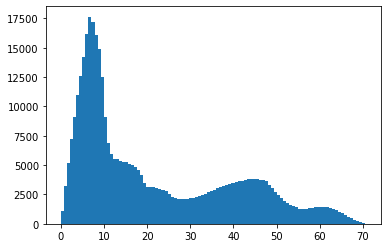

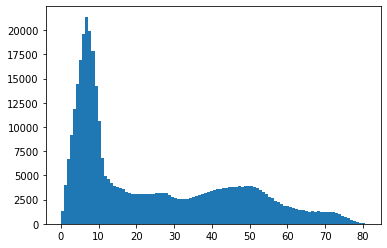

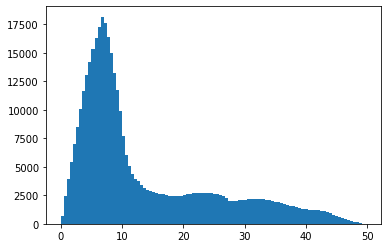

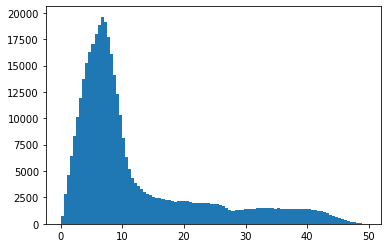

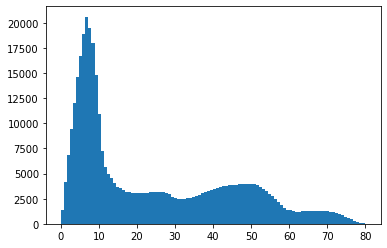

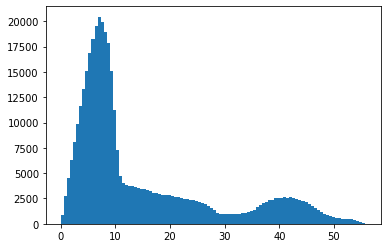

tube_list: [2, 3, 5, 1]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/AD.NORCERESEARCH.NO/javi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2737, in safe_execfile
    py3compat.execfile(
  File "/home/AD.NORCERESEARCH.NO/javi/.local/lib/python3.8/site-packages/IPython/utils/py3compat.py", line 55, in execfile
    exec(compiler(f.read(), fname, "exec"), glob, loc)
  File "/home/AD.NORCERESEARCH.NO/javi/github/BADChIMP-cpp/PythonScripts/distance_map.py", line 128, in <module>
    slice[is_zero] += new_slice - npmin(new_slice[nonzero(new_slice)]) + npmax(slice)
numpy.core._exceptions._UFuncOutputCastingError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/AD.NORCERESEARCH.NO/javi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.struc

In [44]:
%run PythonScripts/distance_map.py blood/mesh/fontan_stor_v5_L1_bl050_sl3.vtu blood/centerlines.vtp 0.5 2